<a href="https://colab.research.google.com/github/codebreaker0511/PulseSort/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from google.colab import files
uploaded = files.upload()

Saving index_finger_data.csv to index_finger_data (2).csv
Saving okay_data.csv to okay_data (2).csv


In [40]:
df_1 = pd.read_csv("index_finger_data.csv")
df_2 = pd.read_csv("okay_data.csv")
print(df_1.head())
print()
print(df_2.head())

   ch1  ch2  timestamp_ms         label
0  524  493             0  index_finger
1  532  576            10  index_finger
2  488  488            20  index_finger
3  579  538            30  index_finger
4  476  527            40  index_finger

   ch1  ch2  timestamp_ms label
0  549  518             0  okay
1  557  601            10  okay
2  513  513            20  okay
3  603  563            30  okay
4  501  552            40  okay


In [41]:
def Normalize_the_ch(x):
    return x/1023

NORMALIZING THE DATA FOR INDEX_FINGER AND OKAY_DATA:-

In [42]:
df_1["ch1"] = Normalize_the_ch(df_1["ch1"])
df_1["ch2"] = Normalize_the_ch(df_1["ch2"])

df_2["ch1"] = Normalize_the_ch(df_2["ch1"])
df_2["ch2"] = Normalize_the_ch(df_2["ch2"])

print(df_1.head())
print()
print(df_2.head())

        ch1       ch2  timestamp_ms         label
0  0.512219  0.481916             0  index_finger
1  0.520039  0.563050            10  index_finger
2  0.477028  0.477028            20  index_finger
3  0.565982  0.525904            30  index_finger
4  0.465298  0.515152            40  index_finger

        ch1       ch2  timestamp_ms label
0  0.536657  0.506354             0  okay
1  0.544477  0.587488            10  okay
2  0.501466  0.501466            20  okay
3  0.589443  0.550342            30  okay
4  0.489736  0.539589            40  okay


DEFINING FUNCTIONS FOR CALCULATING ERRORS:-

In [43]:
# here MAV mean absolute value
def MAV(x):
    return np.mean(abs(x))

def RMSE(x, mean):
    return np.sqrt(np.mean((x - mean) ** 2))

def MSE(x,mean):
    return np.mean((x - mean) ** 2)


In [44]:
def sliding_window(x, window_size, step_size):
    windows = []
    for i in range(0, len(x) - window_size + 1, step_size):
        windows.append(x[i:i+window_size])
    return windows


In [45]:
def extract_features(window_ch1, window_ch2):
    mean_ch1 = np.mean(window_ch1)
    mean_ch2 = np.mean(window_ch2)

    return [
        RMSE(window_ch1,mean_ch1),        # rmse_ch1
        MAV(window_ch1),       # mae_ch1
        MSE(window_ch1, mean_ch1),  # mse_ch1

        RMSE(window_ch2,mean_ch2),        # rmse_ch2
        MAV(window_ch2),       # mae_ch2
        MSE(window_ch2, mean_ch2)   # mse_ch2
    ]

In [48]:

def process_file(input_csv, output_csv, label):
    df = pd.read_csv(input_csv)
    df["ch1"] = Normalize_the_ch(df["ch1"])
    df["ch2"] = Normalize_the_ch(df["ch2"])

    window_size = 100
    step_size = 10
    ch1_windows = sliding_window(df['ch1'].values, window_size, step_size)
    ch2_windows = sliding_window(df['ch2'].values, window_size, step_size)

    features = []
    for win_ch1, win_ch2 in zip(ch1_windows, ch2_windows):
        feat = extract_features(win_ch1, win_ch2)
        feat.append(label)
        features.append(feat)

    feature_cols = ['rms_ch1', 'mav_ch1', 'mse_ch1', 'rms_ch2', 'mav_ch2', 'mse_ch2', 'label']
    pd.DataFrame(features, columns=feature_cols).to_csv(output_csv, index=False)

    print(f"Processed {len(features)} windows -> {output_csv}")
    print(f"{output_csv} file has been created.")
    print()

def plot_features(feature_csv):
    df = pd.read_csv(feature_csv)

    # Plot RMS
    plt.figure(figsize=(14,7))
    plt.plot(df['rms_ch1'], label='Channel 1')
    plt.plot(df['rms_ch2'], label='Channel 2')
    plt.title('RMS Across Windows')
    plt.xlabel('Window Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot MAV
    plt.figure(figsize=(14,7))
    plt.plot(df['mav_ch1'], label='Channel 1')
    plt.plot(df['mav_ch2'], label='Channel 2')
    plt.title('MAV Across Windows')
    plt.xlabel('Window Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot MSE
    plt.figure(figsize=(14,7))
    plt.plot(df['mse_ch1'], label='Channel 1')
    plt.plot(df['mse_ch2'], label='Channel 2')
    plt.title('MSE Across Windows')
    plt.xlabel('Window Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

process_file("index_finger_data.csv", "features_index_finger.csv", "index_finger")
process_file("okay_data.csv", "features_okay.csv", "okay")

Processed 291 windows -> features_index_finger.csv
features_index_finger.csv file has been created.

Processed 291 windows -> features_okay.csv
features_okay.csv file has been created.



PLOTTING THE DATA FOR INDEX_FINGER.CSV :-

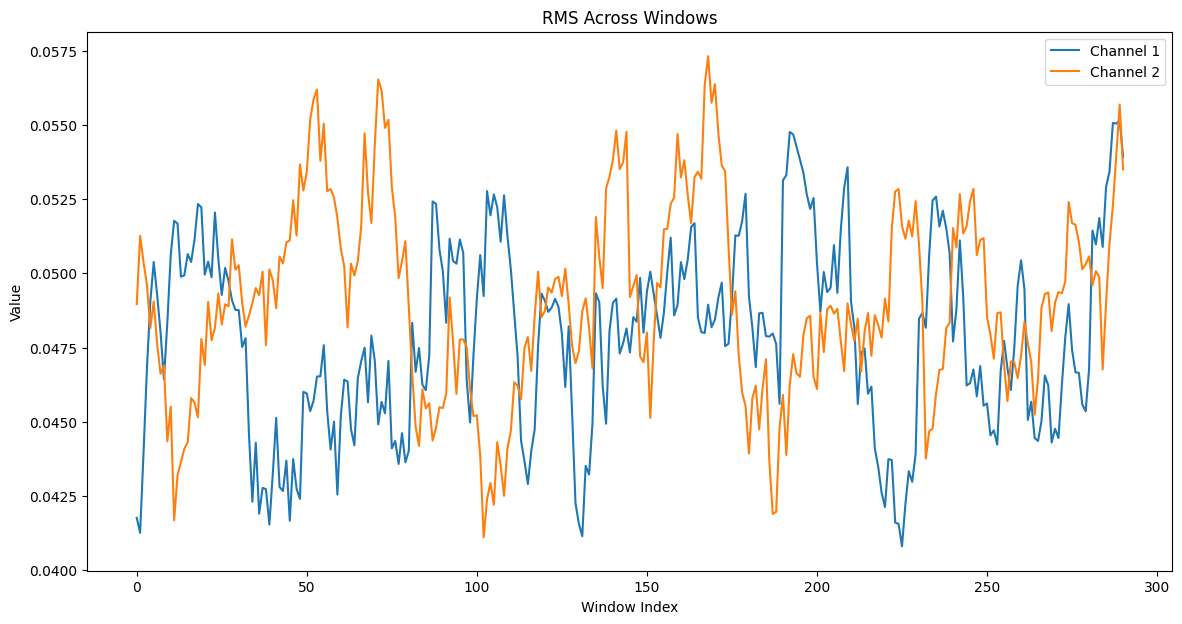

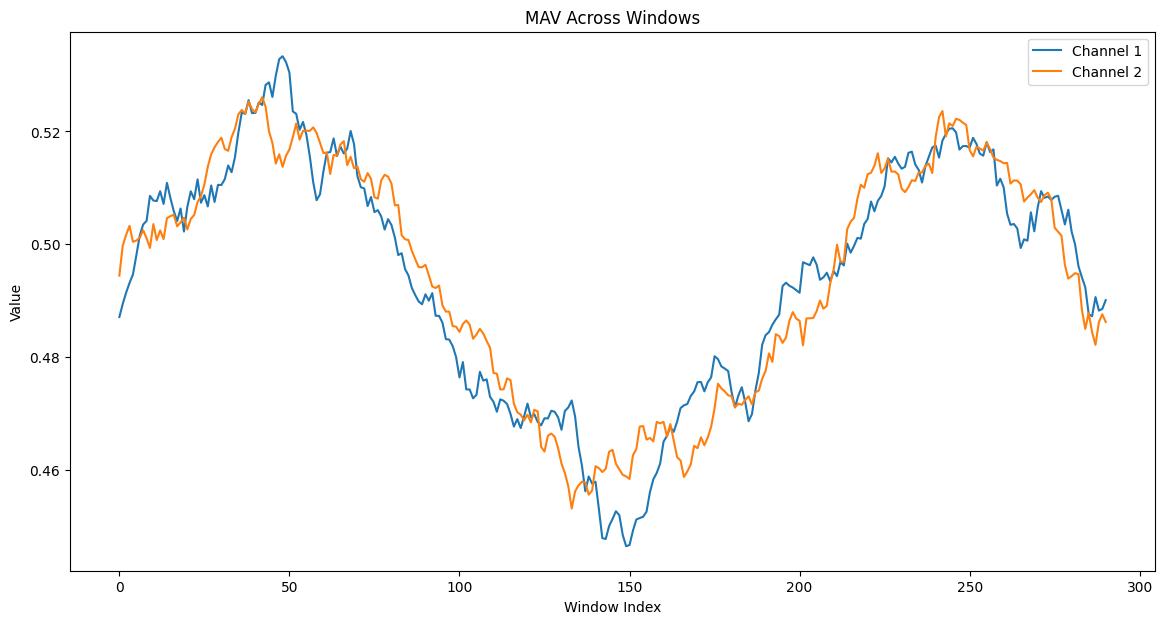

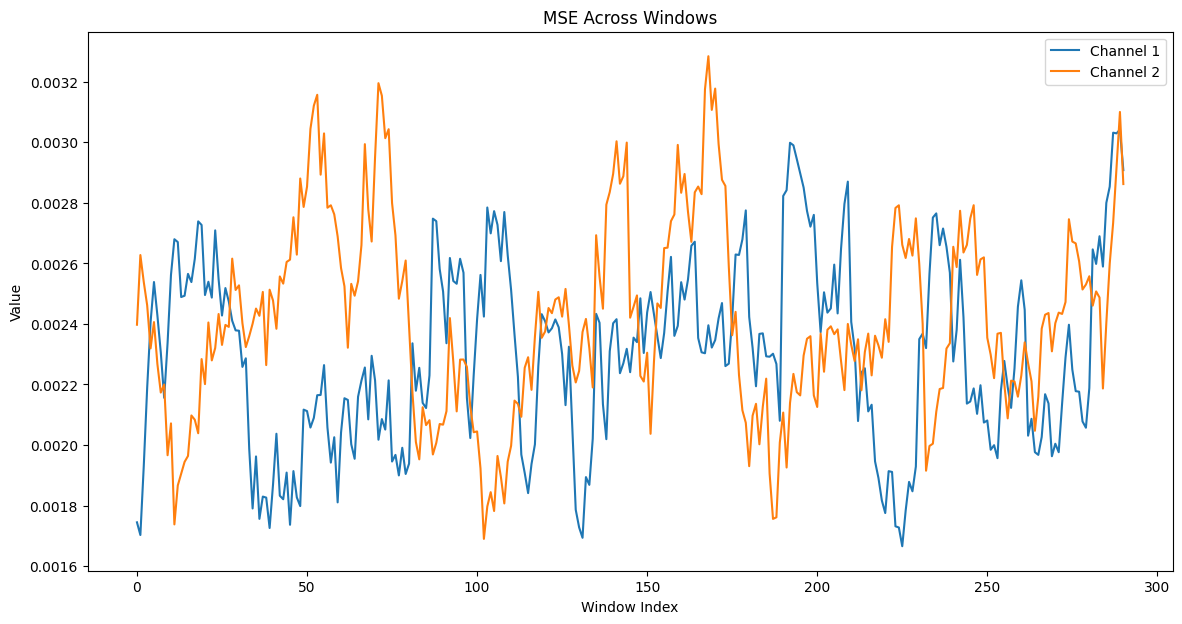

In [49]:
plot_features("features_index_finger.csv")